# Used Car Datataset - Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as stats

In [3]:
car = pd.read_csv("/Users/rahulmeena/Imarticus/GitHub/IMARTICUS/Datasets/class_exercise/used_car.csv")
df = car.copy()

In [4]:
df

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.2,5.0,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.7,5.0,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.8,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74 bh,5.0,4.75
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71 bh,5.0,4.00
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112 b,8.0,2.90
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.1,5.0,2.65


In [3]:
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.2,5.0,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.7,5.0,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.8,5.0,17.74


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   float64
 9   Engine             5983 non-null   float64
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  Price              6019 non-null   float64
dtypes: float64(4), int64(3), object(6)
memory usage: 611.4+ KB


In [123]:
df.shape

(6019, 13)

Power columns should be float data type

In [124]:
# Function to clean and convert power values
def clean_power(value):
    # Treat common null-like values as NaN
    if pd.isna(value) or value.strip().lower() in ['null', '']:
        return np.nan  # Return NaN for missing/empty values and 'null'
    try:
        # Remove non-numeric characters and keep decimal points
        cleaned_value = ''.join(c for c in value if c.isdigit() or c == '.')
        return float(cleaned_value)  # Convert to float
    except ValueError:
        return np.nan  # Return NaN if conversion fails

In [125]:
df['Power'] = df['Power'].apply(clean_power)
df['Power'].dtype

dtype('float64')

## EDA

### Categorical Data

In [126]:
df.dtypes[df.dtypes == 'object'].index

Index(['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type'], dtype='object')

In [127]:
# Dropping the irrelevant columns
df.drop(columns= "Name", inplace=True)

In [128]:
# location
df['Location'].value_counts()

Location
Mumbai        790
Hyderabad     742
Kochi         651
Coimbatore    636
Pune          622
Delhi         554
Kolkata       535
Chennai       494
Jaipur        413
Bangalore     358
Ahmedabad     224
Name: count, dtype: int64

In [129]:
# Fuel type
df['Fuel_Type'].value_counts()

Fuel_Type
Diesel      3205
Petrol      2746
CNG           56
LPG           10
Electric       2
Name: count, dtype: int64

In [130]:
# Transmission
df['Transmission'].value_counts()

Transmission
Manual       4299
Automatic    1720
Name: count, dtype: int64

In [131]:
# Owner_Type
df['Owner_Type'].value_counts()

Owner_Type
First             4929
Second             968
Third              113
Fourth & Above       9
Name: count, dtype: int64

### Numerical Data

In [132]:
df.dtypes[df.dtypes != 'object'].index

Index(['Unnamed: 0', 'Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power',
       'Seats', 'Price'],
      dtype='object')

In [133]:
# Skewness
# Positive -> Right Skew
# Negative -> Left Skew
# Zero -> Normal
df['Price'].skew() 

3.3352319876668415

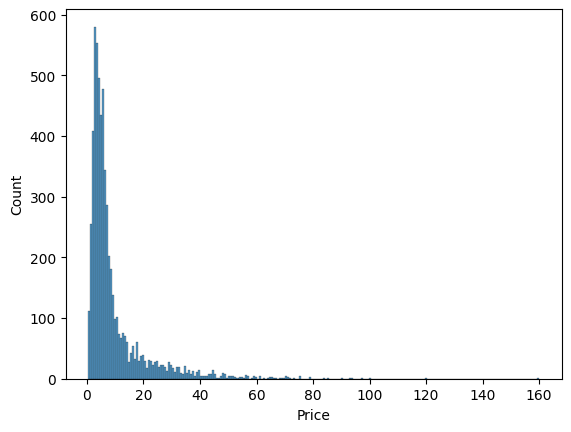

In [134]:
sns.histplot(df['Price'])
plt.show()

In [135]:
df['Price'].describe()

count    6019.000000
mean        9.479468
std        11.187917
min         0.440000
25%         3.500000
50%         5.640000
75%         9.950000
max       160.000000
Name: Price, dtype: float64

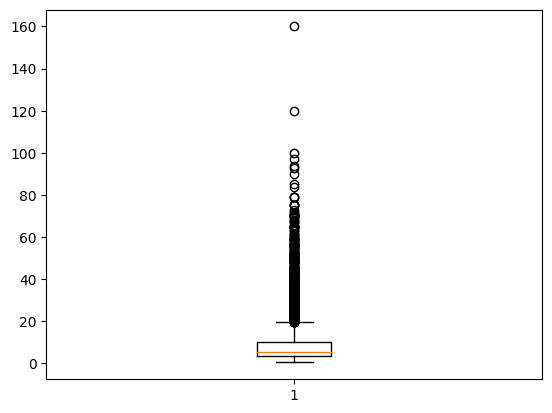

In [136]:
plt.boxplot(df['Price'])
plt.show()

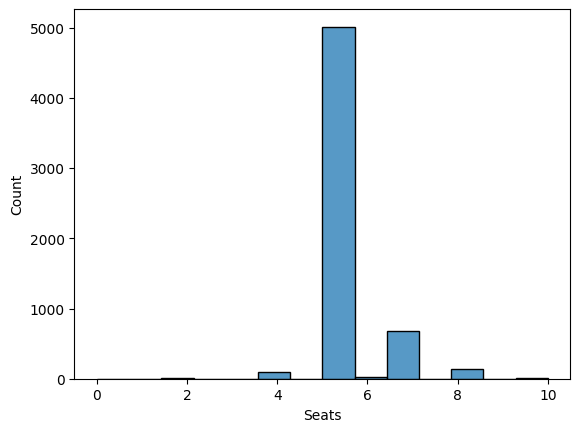

In [137]:
sns.histplot(df['Seats'])
plt.show()

It should be categorical

In [138]:
# Bivariate Analysis

In [139]:
df.head()

,Unnamed: 0,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


<Axes: xlabel='Year', ylabel='Price'>

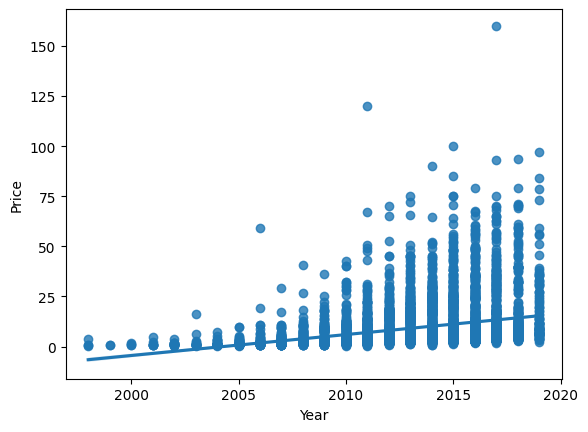

In [140]:
sns.regplot(x=df['Year'], y=df['Price'])

In [141]:
df[['Year', 'Price']].corr()

,Year,Price
Year,1.000000,0.305327
Price,0.305327,1.000000


In [118]:
# correlation is just ok.

In [142]:
df[['Seats', 'Price']].corr()

,Seats,Price
Seats,1.000000,0.052225
Price,0.052225,1.000000


In [144]:
# Very weal correlation. drop this

In [146]:
df[['Kilometers_Driven', 'Price']].corr()

,Kilometers_Driven,Price
Kilometers_Driven,1.000000,-0.011493
Price,-0.011493,1.000000


In [147]:
# Very weak corr

In [148]:
df[['Engine', 'Price']].corr()

,Engine,Price
Engine,1.000000,0.658354
Price,0.658354,1.000000


In [149]:
# strong corr

In [150]:
df[['Power', 'Price']].corr()

,Power,Price
Power,1.000000,0.772558
Price,0.772558,1.000000


In [151]:
# strong corr

In [152]:
df[['Mileage', 'Price']].corr()

,Mileage,Price
Mileage,1.000000,-0.306593
Price,-0.306593,1.000000


In [ ]:
# just ok corr

### Categorical and Numerical

In [ ]:
## Hypothesis

### Outlier

In [155]:
df.head()

,Unnamed: 0,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


In [154]:
# Numerical
df.dtypes[df.dtypes != 'object'].index

Index(['Unnamed: 0', 'Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power',
       'Seats', 'Price'],
      dtype='object')

In [157]:
num_data = df[['Price', 'Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power',
       'Seats']]

In [159]:
# Detection
# Percentile Method
num_data.describe(percentiles=[0.01,.02,.03,.04,.05,.1,.25,.5,.75, .9, .95, .96, .97,.98,.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,10%,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
Price,6019.0,9.479468,11.187917,0.44,0.90,1.2,1.3954,1.50,1.70,2.30,3.50,5.64,9.95,22.5,32.446,35.5836,39.5046,45.6164,56.00,160.00
Year,6019.0,2013.358199,3.269742,1998.00,2004.00,2005.0,2006.0000,2007.00,2007.00,2009.00,2011.00,2014.00,2016.00,2017.0,2018.000,2018.0000,2018.0000,2018.0000,2019.00,2019.00
Kilometers_Driven,6019.0,58738.380296,91268.843206,171.00,4037.44,7272.0,9928.0800,11800.96,13007.40,20000.00,34000.00,53000.00,73000.00,97000.0,120000.000,127022.8400,136559.9200,150000.0000,172829.00,6500000.00
Mileage,6017.0,18.134961,4.582289,0.00,0.00,10.0,10.9000,11.18,11.50,12.80,15.17,18.15,21.10,24.0,25.470,25.8000,26.2000,26.8300,28.09,33.54
Engine,5983.0,1621.276450,601.355233,72.00,796.00,796.0,799.0000,814.00,995.30,1061.00,1198.00,1493.00,1984.00,2494.0,2982.000,2982.0000,2987.0000,2993.0000,3197.18,5998.00
Power,5876.0,113.249869,53.872417,34.20,38.40,47.3,53.3000,55.20,58.16,67.04,75.00,97.70,138.10,184.0,204.000,235.0000,241.4000,258.0000,286.50,560.00
Seats,5977.0,5.278735,0.808840,0.00,4.00,5.0,5.0000,5.00,5.00,5.00,5.00,5.00,5.00,7.0,7.000,7.0000,7.0000,8.0000,8.00,10.00


In [161]:
def outlier_percentile(x):
    x=x.clip(upper = x.quantile(.99))
    x=x.clip(lower = x.quantile(.01))
    return x

In [162]:
num_data1=num_data.apply(outlier_percentile)  # here the function will be used on each variable
num_data1.describe(percentiles=[0.01,.02,.03,.04,.05,.1,.25,.5,.75, .9, .95, .96, .97,.98,.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,10%,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
Price,6019.0,9.330555,10.293647,0.90,0.9000,1.2,1.3954,1.50,1.70,2.30,3.50,5.64,9.95,22.5,32.446,35.5836,39.5046,45.6164,56.0000,56.00
Year,6019.0,2013.378302,3.201072,2004.00,2004.0000,2005.0,2006.0000,2007.00,2007.00,2009.00,2011.00,2014.00,2016.00,2017.0,2018.000,2018.0000,2018.0000,2018.0000,2019.0000,2019.00
Kilometers_Driven,6019.0,56951.095837,32431.693099,4037.44,4053.3808,7272.0,9928.0800,11800.96,13007.40,20000.00,34000.00,53000.00,73000.00,97000.0,120000.000,127022.8400,136559.9200,150000.0000,172688.7800,172829.00
Mileage,6017.0,18.121805,4.547482,0.00,0.0000,10.0,10.9000,11.18,11.50,12.80,15.17,18.15,21.10,24.0,25.470,25.8000,26.2000,26.8300,28.0900,28.09
Engine,5983.0,1614.557881,570.063308,796.00,796.0000,796.0,799.0000,814.00,995.30,1061.00,1198.00,1493.00,1984.00,2494.0,2982.000,2982.0000,2987.0000,2993.0000,3197.0324,3197.18
Power,5876.0,112.518868,50.327837,38.40,38.4000,47.3,53.3000,55.20,58.16,67.04,75.00,97.70,138.10,184.0,204.000,235.0000,241.4000,258.0000,283.1250,286.50
Seats,5977.0,5.282583,0.780849,4.00,4.0000,5.0,5.0000,5.00,5.00,5.00,5.00,5.00,5.00,7.0,7.000,7.0000,7.0000,8.0000,8.0000,8.00


### Missing Value Treatment

In [163]:
# Detection of missing value
num_data1.isnull().sum()  

Price                  0
Year                   0
Kilometers_Driven      0
Mileage                2
Engine                36
Power                143
Seats                 42
dtype: int64

In [164]:
num_data2=num_data1.fillna(num_data1.mean()) # filling missing value with mean 

In [166]:
# Detection of missing value
num_data2.isnull().sum()  

Price                0
Year                 0
Kilometers_Driven    0
Mileage              0
Engine               0
Power                0
Seats                0
dtype: int64

In [167]:
df.dtypes[df.dtypes=="object"].index

Index(['Location', 'Fuel_Type', 'Transmission', 'Owner_Type'], dtype='object')

In [168]:
cat_data=df[['Location', 'Fuel_Type', 'Transmission', 'Owner_Type']]

In [169]:
new_df=pd.concat([cat_data, num_data2], axis=1)
new_df.shape

(6019, 11)

## Creating Dummies

In [171]:
new_df_dummy=pd.get_dummies(data=new_df, columns=['Location', 'Fuel_Type', 'Transmission', 'Owner_Type'],dtype="int")
new_df_dummy

,Price,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Location_Ahmedabad,Location_Bangalore,Location_Chennai,...,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Owner_Type_First,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,1.75,2010,72000.0,26.60,998.0,58.16,5.0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
1,12.50,2015,41000.0,19.67,1582.0,126.20,5.0,0,0,0,...,1,0,0,0,0,1,1,0,0,0
2,4.50,2011,46000.0,18.20,1199.0,88.70,5.0,0,0,1,...,0,0,0,1,0,1,1,0,0,0
3,6.00,2012,87000.0,20.77,1248.0,88.76,7.0,0,0,1,...,1,0,0,0,0,1,1,0,0,0
4,17.74,2013,40670.0,15.20,1968.0,140.80,5.0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,4.75,2014,27365.0,28.09,1248.0,74.00,5.0,0,0,0,...,1,0,0,0,0,1,1,0,0,0
6015,4.00,2015,100000.0,24.40,1120.0,71.00,5.0,0,0,0,...,1,0,0,0,0,1,1,0,0,0
6016,2.90,2012,55000.0,14.00,2498.0,112.00,8.0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
6017,2.65,2013,46000.0,18.90,998.0,67.10,5.0,0,0,0,...,0,0,0,1,0,1,1,0,0,0


In [172]:
new_df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Price                      6019 non-null   float64
 1   Year                       6019 non-null   int64  
 2   Kilometers_Driven          6019 non-null   float64
 3   Mileage                    6019 non-null   float64
 4   Engine                     6019 non-null   float64
 5   Power                      6019 non-null   float64
 6   Seats                      6019 non-null   float64
 7   Location_Ahmedabad         6019 non-null   int64  
 8   Location_Bangalore         6019 non-null   int64  
 9   Location_Chennai           6019 non-null   int64  
 10  Location_Coimbatore        6019 non-null   int64  
 11  Location_Delhi             6019 non-null   int64  
 12  Location_Hyderabad         6019 non-null   int64  
 13  Location_Jaipur            6019 non-null   int64

In [173]:
new_df_dummy.head()

,Price,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Location_Ahmedabad,Location_Bangalore,Location_Chennai,...,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Owner_Type_First,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,1.75,2010,72000.0,26.60,998.0,58.16,5.0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
1,12.50,2015,41000.0,19.67,1582.0,126.20,5.0,0,0,0,...,1,0,0,0,0,1,1,0,0,0
2,4.50,2011,46000.0,18.20,1199.0,88.70,5.0,0,0,1,...,0,0,0,1,0,1,1,0,0,0
3,6.00,2012,87000.0,20.77,1248.0,88.76,7.0,0,0,1,...,1,0,0,0,0,1,1,0,0,0
4,17.74,2013,40670.0,15.20,1968.0,140.80,5.0,0,0,0,...,1,0,0,0,1,0,0,0,1,0


<Axes: xlabel='Price', ylabel='Count'>

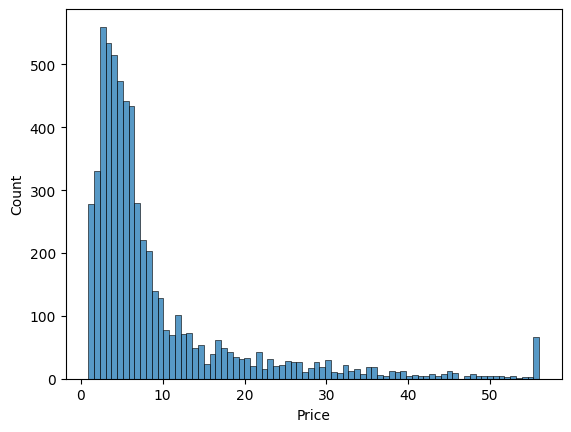

In [174]:
sns.histplot(new_df_dummy['Price'])

In [178]:
stats.shapiro(new_df_dummy["Price"])

AttributeError: Module 'scipy' has no attribute 'shapiro'

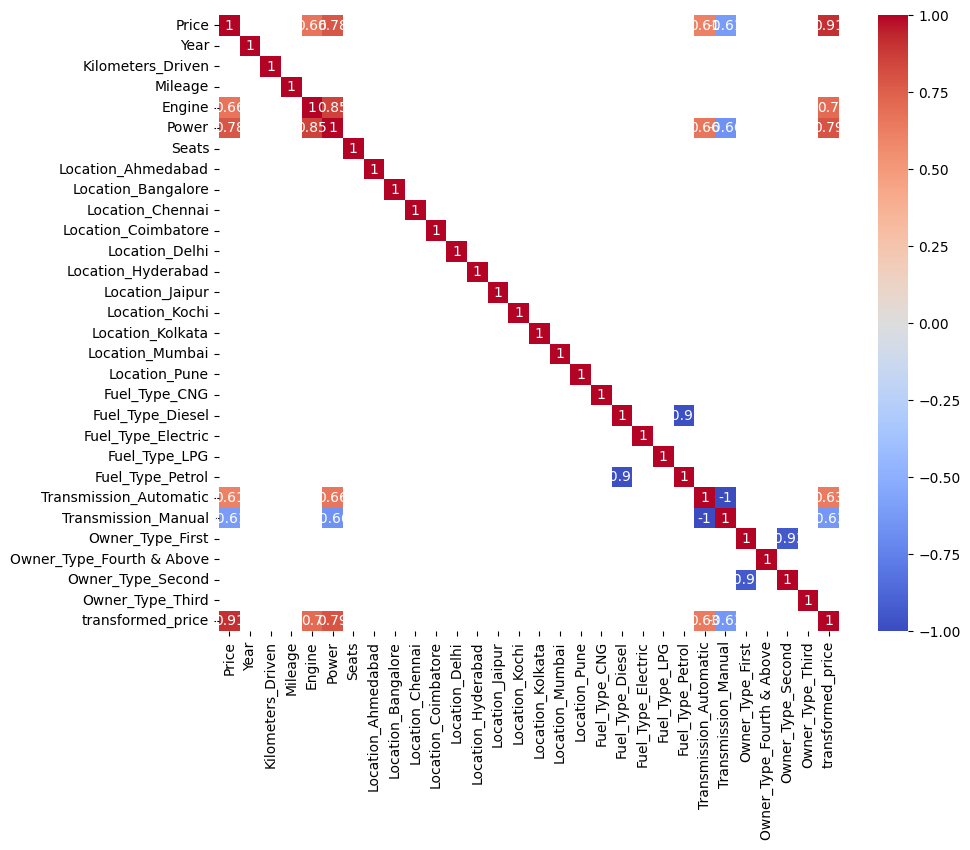

In [182]:
# Multicollinearity 
plt.figure(figsize=(10,8))
cr=new_df_dummy.corr()
cr=cr[abs(cr)>.6]
sns.heatmap(cr, annot=True, cmap="coolwarm")
plt.show()

## Train Model

In [183]:
import statsmodels

In [184]:
new_df_dummy.columns

Index(['Price', 'Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power',
       'Seats', 'Location_Ahmedabad', 'Location_Bangalore', 'Location_Chennai',
       'Location_Coimbatore', 'Location_Delhi', 'Location_Hyderabad',
       'Location_Jaipur', 'Location_Kochi', 'Location_Kolkata',
       'Location_Mumbai', 'Location_Pune', 'Fuel_Type_CNG', 'Fuel_Type_Diesel',
       'Fuel_Type_Electric', 'Fuel_Type_LPG', 'Fuel_Type_Petrol',
       'Transmission_Automatic', 'Transmission_Manual', 'Owner_Type_First',
       'Owner_Type_Fourth & Above', 'Owner_Type_Second', 'Owner_Type_Third',
       'transformed_price'],
      dtype='object')